# Import required libraries

In [1]:
import torch
from sys import platform
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Model

In [2]:
MODEL_CODE = "yolov8x-oiv7" # YOLOv8 pretrained on Open Images v7
FOLDER_NAME = "detection_results"

In [3]:
def detect(model, img_path: str) -> list:
    """
    Detect objects in an image using a YOLO model.
    Args:
        model: YOLO model
        img_path: path to the image
    Returns:
        results: list of detected objects
    """
    device = 'cuda' if torch.cuda.is_available() else ('mps' if platform == 'darwin' else 'cpu')
    results = model(img_path, save=True, show_boxes=True, device=device)
    return results


def plot_result(result: list):
    """
    Plot the results of the detection.
    Args:
        results: list of detected objects
    """
    plot = result.plot()[:, :, ::-1] # BGR to RGB
    plt.imshow(plot)
    plt.axis('off')
    plt.show()


Found https://media.designcafe.com/wp-content/uploads/2019/11/17060449/Q4aC8wUjahqVLa2vUA5BgXRrzAJSMzDFlwwZ8QFwAhGlDx4fAgLyCZ7ASBin-V9DxAGxg-0R0ngsCX75Fm5KI53AhRsrNnOVSCBCZ5usrlkXhSlyUp7dGFkRWVC1lvLVLOZNNaUX.jpeg locally at Q4aC8wUjahqVLa2vUA5BgXRrzAJSMzDFlwwZ8QFwAhGlDx4fAgLyCZ7ASBin-V9DxAGxg-0R0ngsCX75Fm5KI53AhRsrNnOVSCBCZ5usrlkXhSlyUp7dGFkRWVC1lvLVLOZNNaUX.jpeg
image 1/1 /Users/lorenzoantonelli/Desktop/ComputerVision/Q4aC8wUjahqVLa2vUA5BgXRrzAJSMzDFlwwZ8QFwAhGlDx4fAgLyCZ7ASBin-V9DxAGxg-0R0ngsCX75Fm5KI53AhRsrNnOVSCBCZ5usrlkXhSlyUp7dGFkRWVC1lvLVLOZNNaUX.jpeg: 640x640 1 Chair, 1 Coffee table, 2 Flowerpots, 1 House, 2 Houseplants, 1 Shelf, 1 Stairs, 1 Studio couch, 1 Window, 134.8ms
Speed: 22.2ms preprocess, 134.8ms inference, 158.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /Users/lorenzoantonelli/Desktop/cv_demo/runs/detect/predict7


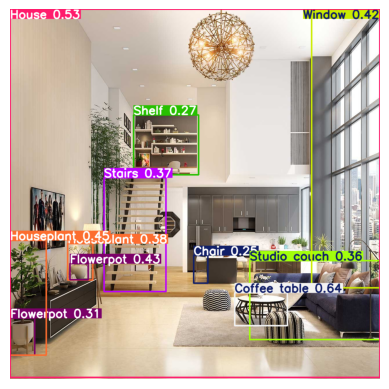

In [4]:
%matplotlib inline

model = YOLO(MODEL_CODE)
demo_image = "https://media.designcafe.com/wp-content/uploads/2019/11/17060449/Q4aC8wUjahqVLa2vUA5BgXRrzAJSMzDFlwwZ8QFwAhGlDx4fAgLyCZ7ASBin-V9DxAGxg-0R0ngsCX75Fm5KI53AhRsrNnOVSCBCZ5usrlkXhSlyUp7dGFkRWVC1lvLVLOZNNaUX.jpeg"

results = detect(model, demo_image)
plot_result(results[0])

# Model fine-tuning (classification)


In [5]:
# model = YOLO("yolo11x-cls.pt")

# model.train(data="mnist", epochs=4, device="mps", imgsz=32, classes=10, batch=-1)